# Decision Trees – Theoretical & Practical (Q&A)

This notebook contains concise theoretical answers and runnable Python code for practical questions using **scikit-learn**.

## Theoretical

**T1. What is a Decision Tree, and how does it work?**

A Decision Tree is a supervised learning model that splits the feature space into regions using a series of **if–else** rules.
Each internal node tests a feature (e.g., `petal_length ≤ 2.45`), branches represent outcomes, and leaves output a class (classification) or a value (regression).
It selects splits greedily to maximize purity (minimize impurity) of the resulting child nodes.

**T2. What are impurity measures in Decision Trees?**

Metrics that quantify how mixed the classes are in a node. Common measures: **Gini impurity**, **Entropy (Information Gain)**, and for regression **variance/MSE**.

**T3. What is the mathematical formula for Gini impurity?**

For a node with class probabilities \(p_k\):  
\(\displaystyle \text{Gini}(t) = \sum_{k=1}^{K} p_k(1-p_k) = 1 - \sum_{k=1}^{K} p_k^2\).

**T4. What is the mathematical formula for Entropy?**

For class probabilities \(p_k\):  
\(\displaystyle H(t) = -\sum_{k=1}^{K} p_k \log_2 p_k\) (define \(0 \log 0 = 0\)).

**T5. What is Information Gain, and how is it used in Decision Trees?**

Information Gain is the reduction in impurity after a split:  
\(\text{IG} = \text{Impurity(parent)} - \sum_{j \in \{L,R\}} \frac{N_j}{N} \text{Impurity}(j)\).  
Trees choose the feature/threshold with the **highest** IG (or equivalently the lowest weighted child impurity).

**T6. Difference between Gini and Entropy?**

Both measure node impurity and often yield similar trees. Gini is slightly faster (no log) and tends to isolate the most frequent class; Entropy is more information-theoretic and can be more sensitive to class distribution differences.

**T7. Mathematical explanation behind Decision Trees?**

They perform a **greedy recursive binary partitioning** of the feature space. At each node, pick the split that minimizes expected impurity of children. The process continues until stopping criteria are met (e.g., max depth, min samples per leaf).

**T8. What is Pre-Pruning in Decision Trees?**

Stopping tree growth early via constraints like `max_depth`, `min_samples_split`, `min_samples_leaf`, or a minimum impurity decrease. Prevents overfitting by limiting complexity during training.

**T9. What is Post-Pruning in Decision Trees?**

Grow a full tree and then **prune back** subtrees using a criterion such as **Cost-Complexity Pruning** (α-penalized tree size). Helps simplify the model after it potentially overfits.

**T10. What is the difference between Pre-Pruning and Post-Pruning?**

Pre-pruning restricts growth **during** training; post-pruning **reduces** a grown tree afterward. Pre-pruning is cheaper but may underfit; post-pruning can better balance fit vs. complexity via validation but costs extra computation.

**T11. What is a Decision Tree Regressor?**

A tree that predicts continuous values by minimizing squared error (variance) within leaves. Splits aim to reduce target variance; predictions are typically the mean of training targets in a leaf.

**T12. Advantages and disadvantages of Decision Trees?**

**Advantages:** easy to interpret, little data prep, handles mixed types/nonlinear interactions, invariant to monotonic transforms.  
**Disadvantages:** prone to overfitting, unstable to small data changes, biased toward features with many split points, lower predictive accuracy than ensembles (RF/GBMs).

**T13. How does a Decision Tree handle missing values?**

Scikit-learn trees require imputation beforehand. Some libraries support surrogate splits; otherwise typical approaches are **impute** (mean/median/mode), or add a missing-indicator feature.

**T14. How does a Decision Tree handle categorical features?**

In scikit-learn, categorical features must be **encoded** (e.g., one-hot). Some libraries support native categorical splits; otherwise encode first.

**T15. What are some real-world applications of Decision Trees?**

Credit risk, churn prediction, medical diagnosis, fraud detection, pricing, recommendation pre-modeling, customer segmentation, and as base learners in **Random Forests/Gradient Boosting**.

## Practical
All code uses scikit-learn. Run the first setup cell once.

In [1]:
# Setup: install/ imports
!pip -q install graphviz

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import graphviz

np.random.seed(42)


In [2]:
def show_feature_importances(model, feature_names, top=10):
    importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
    display(importances.head(top))

**P16. Train a Decision Tree Classifier on the Iris dataset and print model accuracy.**

In [3]:
iris = load_iris(as_frame=True)
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
pred = clf_gini.predict(X_test)
acc = accuracy_score(y_test, pred)
print("Test Accuracy (Gini):", acc)

Test Accuracy (Gini): 0.9333333333333333


**P17. Train Decision Tree Classifier using Gini and print feature importances.**

In [4]:
show_feature_importances(clf_gini, iris.feature_names)

,0
petal length (cm),0.558568
petal width (cm),0.406015
sepal width (cm),0.029167
sepal length (cm),0.006250


**P18. Train Decision Tree Classifier using Entropy and print model accuracy.**

In [5]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
pred_e = clf_entropy.predict(X_test)
print("Test Accuracy (Entropy):", accuracy_score(y_test, pred_e))

Test Accuracy (Entropy): 0.9333333333333333


**P19. Train a Decision Tree Regressor on a housing dataset and evaluate MSE.**

In [6]:
housing = fetch_california_housing(as_frame=True)
Xh, yh = housing.data, housing.target
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor(random_state=42)
reg.fit(Xh_train, yh_train)
pred_h = reg.predict(Xh_test)
print("Decision Tree Regressor MSE:", mean_squared_error(yh_test, pred_h))

Decision Tree Regressor MSE: 0.495235205629094


**P20. Train a Decision Tree Classifier and visualize using graphviz.**

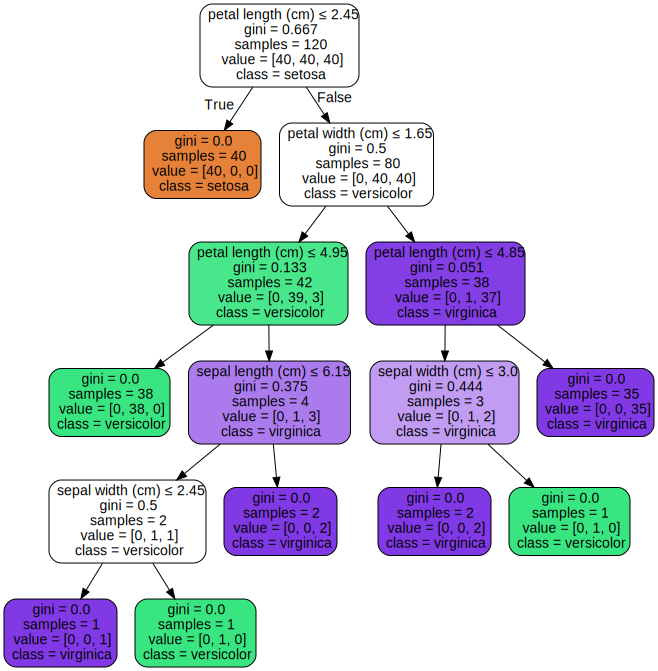

In [7]:
dot = export_graphviz(clf_gini, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot)
graph

**P21. Decision Tree with `max_depth=3` vs default; compare accuracy.**

In [8]:
clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_depth3.fit(X_train, y_train)
acc_depth3 = accuracy_score(y_test, clf_depth3.predict(X_test))
print("Accuracy (max_depth=3):", acc_depth3)
print("Accuracy (unrestricted - Gini):", acc)

Accuracy (max_depth=3): 0.9666666666666667
Accuracy (unrestricted - Gini): 0.9333333333333333


**P22. Decision Tree with `min_samples_split=5` vs default.**

In [9]:
clf_mss5 = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_mss5.fit(X_train, y_train)
print("Accuracy (min_samples_split=5):", accuracy_score(y_test, clf_mss5.predict(X_test)))
print("Accuracy (default - Gini):", acc)

Accuracy (min_samples_split=5): 0.9666666666666667
Accuracy (default - Gini): 0.9333333333333333


**P23. Apply feature scaling before training and compare accuracy with unscaled data.**

In [10]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, y, test_size=0.2, stratify=y, random_state=42)
clf_scaled = DecisionTreeClassifier(random_state=42).fit(Xs_train, ys_train)
print("Accuracy (scaled):", accuracy_score(ys_test, clf_scaled.predict(Xs_test)))
print("Accuracy (unscaled - Gini):", acc)
# Note: Trees are scale-invariant; accuracies should be similar.


Accuracy (scaled): 0.9333333333333333
Accuracy (unscaled - Gini): 0.9333333333333333


**P24. Train Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass.**

In [11]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr.fit(X_train, y_train)
print("OvR Accuracy:", accuracy_score(y_test, ovr.predict(X_test)))

OvR Accuracy: 0.9666666666666667


**P25. Train a Decision Tree and display feature importances.**

In [12]:
show_feature_importances(clf_gini, iris.feature_names)

,0
petal length (cm),0.558568
petal width (cm),0.406015
sepal width (cm),0.029167
sepal length (cm),0.006250


**P26. Train Decision Tree with `max_depth=5` and compare with unrestricted.**

In [13]:
clf_d5 = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_d5.fit(X_train, y_train)
print("Accuracy (max_depth=5):", accuracy_score(y_test, clf_d5.predict(X_test)))
print("Accuracy (unrestricted - Gini):", acc)

Accuracy (max_depth=5): 0.9333333333333333
Accuracy (unrestricted - Gini): 0.9333333333333333


**P27. Apply Cost Complexity Pruning (CCP) and visualize its effect on accuracy.**

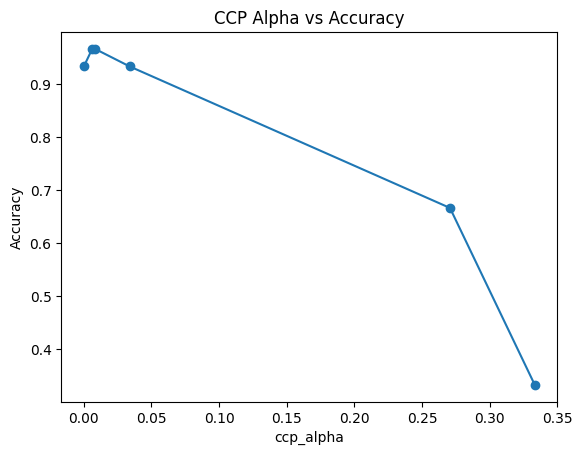

In [14]:
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

accs = []
for a in ccp_alphas:
    m = DecisionTreeClassifier(random_state=42, ccp_alpha=a).fit(X_train, y_train)
    accs.append(accuracy_score(y_test, m.predict(X_test)))

plt.figure()
plt.plot(ccp_alphas, accs, marker='o')
plt.xlabel('ccp_alpha'); plt.ylabel('Accuracy'); plt.title('CCP Alpha vs Accuracy'); plt.show()

**P28. Evaluate precision, recall, and F1-Score of Decision Tree Classifier.**

In [15]:
print(classification_report(y_test, clf_gini.predict(X_test), target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



**P29. Visualize the confusion matrix using seaborn.**

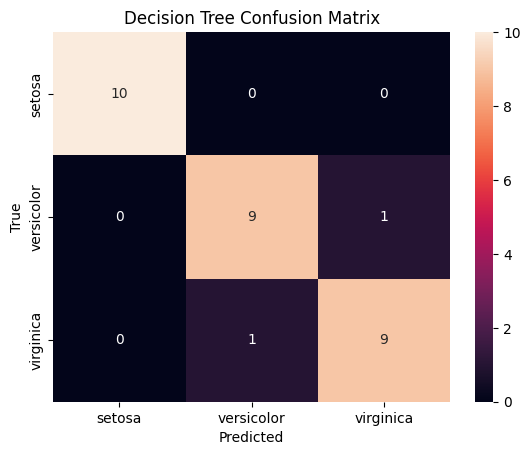

In [16]:
cm = confusion_matrix(y_test, clf_gini.predict(X_test))
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Decision Tree Confusion Matrix')
plt.show()

**P30. Use GridSearchCV to tune `max_depth` and `min_samples_split`.**

In [17]:
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5, 10]
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print('Best Params:', grid.best_params_)
print('Best CV Score:', grid.best_score_)
best = grid.best_estimator_
print('Test Accuracy (best):', accuracy_score(y_test, best.predict(X_test)))

Best Params: {'max_depth': None, 'min_samples_split': 2}
Best CV Score: 0.9416666666666668
Test Accuracy (best): 0.9333333333333333
